In [1]:
'''
How are doctors making touches?
'''

'\nHow are doctors making touches?\n'

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import datetime
import os
import sys
from operator import itemgetter
import random
from optparse import OptionParser
from copy import copy
import numpy as np
from scipy.stats import kstest, mstats
import string
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.colors as colors
import matplotlib.cm as cmx
# import pymc as pm
from math import isnan

In [4]:
plt.style.available

['seaborn-talk',
 'seaborn-bright',
 'seaborn-white',
 'ggplot',
 'seaborn-muted',
 'seaborn-deep',
 'seaborn-colorblind',
 'grayscale',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'dark_background',
 'classic',
 'seaborn-dark',
 'seaborn-paper',
 'seaborn-poster',
 'bmh']

In [5]:
plt.style.use('seaborn-dark')

## Answers 

In [6]:
file_name = '../../data/iphone_responses/backend_patientresponse.csv'
dtypes = {'id': int, 'question_id':str, 'workday':str, 'response':str,
          'patient_id':str, 'check_list_id':str, 'user_id':str}

In [7]:
df_answers = pd.read_csv(file_name, parse_dates=['date'], dtype=dtypes)

In [8]:
admin_list = ['anna', 'john', 'mbechel1', 'memorial', 'admin', 'nm175316']
admin_id_list  = ['2', '3', '4', '5', '7', '8']


In [9]:
doctor_id = df_answers.user_id.unique().tolist()
doctor_id

['10',
 '16',
 '33',
 '7',
 '55',
 '54',
 '57',
 '20',
 '56',
 '8',
 '18',
 '58',
 '3',
 '21']

In [10]:
doctor_count = {} #count number of inputs per doctor
for doc in df_answers.user_id.tolist():
    if doc not in doctor_count:
        doctor_count[doc] = 1
    else:
        doctor_count[doc] += 1

## Touches 

In [11]:
touch_fname = '../../data/iphone_responses/backend_tmetryentry.csv'
touch_dtypes = {'id':str, 'date':str, 'object':str, 'action':str, 'value':str, 'user_id':str}
df_touches = pd.read_csv(touch_fname, parse_dates=['date'], dtype=touch_dtypes)
df_touches = df_touches[~df_touches['user_id'].isin(admin_id_list)]
df_touches= df_touches[2004:]

df_touches.head()

,id,date,object,action,value,user_id
4169,26049,2016-08-04 15:11:24,C: TMetry,BeaconStatus,NaN,54
4170,26050,2016-08-04 15:11:30,C: TMetry,BeaconStatus,NaN,54
4171,26051,2016-08-04 15:11:30,C: TMetry,BeaconStatus,NaN,54
4172,26052,2016-08-04 15:11:35,C: TMetry,BeaconStatus,NaN,54
4173,26053,2016-08-04 15:11:38,C: TMetry,BeaconStatus,NaN,54


In [12]:
df_touches[df_touches['action'] == 'SelectPatientByName']

,id,date,object,action,value,user_id
4285,26165,2016-08-04 15:16:38,C: PatientList,SelectPatientByName,aaad0ab8feb4a1fc7144d941c55d847e4ca74670,54
4480,26360,2016-08-04 16:38:55,C: PatientList,SelectPatientByName,e560f361c578b7e5186fa9eb40e7ddb71d5d0929,54
5009,26889,2016-08-04 18:04:29,C: PatientList,SelectPatientByName,41bb1f82029d24c23088592cf0387b65f3bd01c0,54
5047,26927,2016-08-05 12:47:53,C: PatientList,SelectPatientByName,5c76ee212059505d038c344f81b6dbc39be11204,56
5115,26995,2016-08-06 13:08:59,C: PatientList,SelectPatientByName,6b9d3f95c5723253c43ecf5356f19959bf4f47e9,57
5459,27339,2016-08-08 12:52:40,C: PatientList,SelectPatientByName,06ec79ee24173aea580087c78fae039bf6e08820,56
5470,27350,2016-08-08 12:56:17,C: PatientList,SelectPatientByName,06ec79ee24173aea580087c78fae039bf6e08820,56
5497,27377,2016-08-08 13:06:57,C: PatientList,SelectPatientByName,6d86fd6ff641dfcdee9add36a32d11933f86a8a2,56
7641,29521,2016-08-08 23:35:08,C: PatientList,SelectPatientByName,0d4ff1582f5ebc42112e5687185c4ba424709736,56
7644,29524,2016-08-08 23:35:16,C: PatientList,SelectPatientByName,06ec79ee24173aea580087c78fae039bf6e08820,56


In [13]:
df_touches = df_touches[df_touches['action'] != 'BeaconStatus']

In [14]:
"""
usage_dict stores each touches made by the user (user_id as keys),
for each user, the time it is recorded is considered as 
"""
usage_dict = {}
for index, row in df_touches.iterrows():
    user_id = row.user_id
    action = row.action
    date = row.date
    obj = row.object
    value = row.value
    if user_id not in usage_dict.keys():
        usage_dict[user_id] = {}
    usage_dict[user_id][date] = {'object':obj, 'action':action, 'value':value}

In [15]:
"""
One_time everything:
If the time between the two touches are longer than 120 seconds, consider it different series of touches,
store action and value, when action is related EMRInfoExpanded or EMRInfoHidden, or Answer
"""
store_values  = ['EMRInfoExpanded','EMRInfoHidden','Answer']
use_series_dict = {}

for user, time_dict in usage_dict.items():
    old_time = sorted(list(time_dict.keys()))[0]
    use_series_dict[user] = []
    touch_series = [[old_time,time_dict[old_time]['action'], time_dict[old_time]['value']]]
    for time in sorted(list(time_dict.keys()))[1:]:
        new_time = time
        time_diff = (new_time - old_time).seconds
        if time_diff < 120:
            touch_series.append([time, time_dict[time]['action'], time_dict[time]['value']])
            old_time = new_time
        else:
            use_series_dict[user].append(touch_series)
            touch_series = [[time, time_dict[time]['action'], time_dict[time]['value']]]
            old_time = new_time

In [16]:
"""
Average of number of touches
"""
touch_numbers  = []
for key, val in use_series_dict.items():
    touch_numbers.extend([len(v) for v in val])
touch_numbers = sorted(touch_numbers)


In [17]:
plt.style.use('seaborn-deep')
plt.style.available

['seaborn-talk',
 'seaborn-bright',
 'seaborn-white',
 'ggplot',
 'seaborn-muted',
 'seaborn-deep',
 'seaborn-colorblind',
 'grayscale',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'dark_background',
 'classic',
 'seaborn-dark',
 'seaborn-paper',
 'seaborn-poster',
 'bmh']

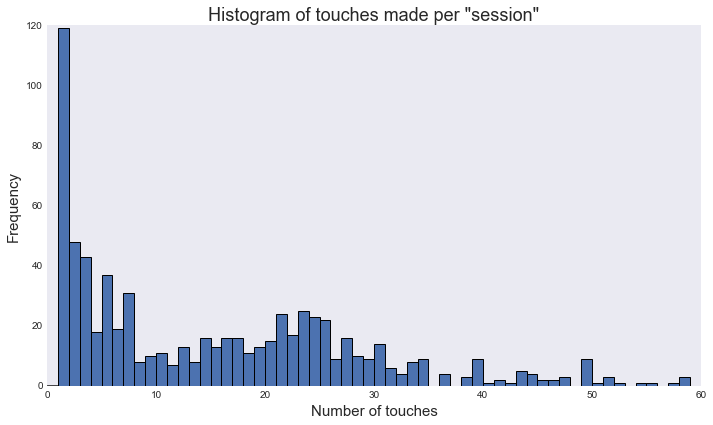

In [18]:
fig_size = (10,6)
font_size = 15

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(touch_numbers[:-10], bins=np.arange(0, max(touch_numbers[:-10]),1))
ax.set_xlabel('Number of touches',fontsize=font_size)
ax.set_ylabel('Frequency',fontsize=font_size)
ax.set_title('Histogram of touches made per "session"',fontsize=1.2*font_size)
plt.tight_layout()
plt.savefig('../../result/iphoneapp/touch_session_frequency_120516.png',transparent=True)

### first to last touch

In [19]:
df_touch_series = pd.DataFrame(index=np.arange(0, max(touch_numbers[:-10]),1))


In [20]:
string = 'T:1 P:6b9d3f95c5723253c43ecf5356f19959bf4f47e9 Q:0702 A:N'

In [21]:
string.split()[2].split(':')[1]

'0702'

In [22]:
for user, touch_series in use_series_dict.items():
    print(user)
    series_i = 0
    for a_series in touch_series: #touch series is all of the series of touches made by the user
        touch_spec = []
        for a_touch in a_series: #a_series is a sequence of touches
            time = a_touch[0]
            action = a_touch[1]
            value = a_touch[2]
            
            if type(value) == float:
                if isnan(value):
                    value = ''
            else:
                if action=='Answer':
                    value= value.split()[2].split(':')[1]
                    
                    if '$' in value:
                        value = value[1:] #get rid of the $ sign
                if action=='SelectPatientByName':
                    value=''
            
            touch_spec.append('{}_{}'.format(action, value))
        df_new_touch_series = pd.DataFrame({'{}_{}'.format(user, series_i):touch_spec})
        print('\t', len(df_new_touch_series))
#         df_touch_series = df_touch_series.append(df_new_touch_series, axis=1) 
        df_touch_series = pd.concat([df_touch_series, df_new_touch_series], axis=1)
#         print(df_touch_series.columns)
        series_i += 1

57
	 1
	 3
	 1
	 1
	 1
	 1
	 1
	 6
	 1
	 16
	 13
	 17
	 5
	 5
	 78
	 1
	 13
	 14
	 24
	 39
56
	 7
	 2
	 6
	 11
	 3
	 10
	 27
	 1
	 1
	 1
	 1
	 1
	 3
	 2
	 2
	 2
	 1
	 1
	 2
	 7
	 19
	 19
	 24
	 20
	 5
	 4
	 17
	 17
	 16
	 12
	 16
	 21
	 1
	 43
	 16
	 27
20
	 5
	 25
	 19
	 7
	 9
	 9
	 14
	 19
	 22
	 3
	 22
	 3
	 15
	 3
	 20
	 10
	 3
	 20
	 13
	 1
	 5
	 10
	 7
	 16
	 2
	 47
	 4
	 25
	 7
	 23
	 17
	 8
	 30
	 18
	 19
	 3
	 16
	 33
	 17
	 23
	 28
	 16
	 32
	 45
	 1
	 23
	 5
	 26
	 7
	 27
	 20
	 41
	 1
	 54
	 22
	 20
	 4
	 3
	 17
	 3
	 9
	 3
	 1
	 20
	 5
	 23
	 9
	 3
	 12
	 1
	 15
	 1
	 2
	 2
	 1
	 112
	 50
	 7
	 4
	 3
	 18
	 1
	 1
	 1
	 1
	 5
	 39
	 1
	 74
	 2
	 7
	 49
	 34
	 1
	 5
	 2
18
	 8
	 1
	 29
	 10
	 15
	 13
	 2
	 13
	 23
	 19
	 1
	 11
	 9
	 19
	 27
	 2
	 21
	 49
	 34
	 49
	 17
	 26
	 58
	 30
	 28
	 21
	 25
	 29
	 21
	 30
	 22
	 24
	 24
	 5
	 1
	 23
	 25
	 2
	 25
	 12
	 10
	 23
	 24
	 1
	 39
	 24
	 12
	 33
	 23
	 22
	 5
	 7
	 44
	 27
	 6
	 1
	 14
	 51
	 36
	 30
	 14
	 14
	 38
	 3
	 

In [23]:
df_touch_series

,57_0,57_1,57_2,57_3,57_4,57_5,57_6,57_7,57_8,57_9,...,21_40,21_41,21_42,21_43,21_44,21_45,21_46,21_47,21_48,21_49
0,ShowGroup_08,SelectPatientByName_,Load_loaded,ShowGroup_06,Logout_nm177881,Load_loaded,Logout_mbechel1,Connecting_nm177881,Load_loaded,Load_loaded,...,ShowGroup_01,EMRInfoExpanded_LINES_FOOD,"SelectPatientOptional(""Nearby"")_9d2ac598ddf2c9...","SelectPatientOptional(""ByName"")_9d2ac598ddf2c9...","SelectPatientOptional(""ByName"")_b40446e9f44e68...","SelectPatientOptional(""ByName"")_eccd8e01167317...",Connecting_nm177671,Logout_,Challenge_nm177671,Challenge_jpaoness
1,NaN,Answer_0701,NaN,NaN,NaN,NaN,NaN,Error_nm177881,NaN,Order_nearby,...,Answer_0201,EMRInfoHidden_LINES_FOOD,ShowGroup_07,ShowGroup_07,ShowGroup_07,ShowGroup_01,Authenticating_nm177671,Challenge_nm177671,Connecting_nm177671,Connecting_jpaoness
2,NaN,Answer_0702,NaN,NaN,NaN,NaN,NaN,Authenticating_nm177881,NaN,Order_roomnumber,...,Answer_0202,Answer_0301,EMRInfoExpanded_DVT,ShowGroup_03,EMRInfoExpanded_DVT,Answer_0101,Logged_nm177671,Challenge Error_nm177671,Logged_nm177671,Error_jpaoness
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connecting_nm177881,NaN,SelectPatientByRoomNumber_df854aeecc3d24dad46c...,...,ShowGroup_06,Answer_0401,EMRInfoHidden_DVT,Answer_0301,EMRInfoHidden_DVT,Answer_0202,Load_loaded,NaN,Load_loaded,Connecting_jpaoness
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Logged_nm177881,NaN,ShowGroup_01,...,ShowGroup_01,EMRInfoExpanded_LINES_FOOD,Answer_0701,Load_loaded,Answer_0701,ShowGroup_08,"SelectPatientOptional(""ByName"")_27178165f86bd3...",NaN,Order_roomnumber,Authenticating_jpaoness
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Load_loaded,NaN,ShowGroup_03,...,Answer_0203,EMRInfoHidden_LINES_FOOD,Answer_0702,"SelectPatientOptional(""ByName"")_da3e58d5fc35fa...",ShowGroup_03,Answer_0801,Load_loaded,NaN,"SelectPatientOptional(""ByRoomNumber"")_34ff225a...",Logged_jpaoness
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer_0301,...,ShowGroup_06,Answer_0501,ShowGroup_08,ShowGroup_01,EMRInfoExpanded_LINES_FOOD,ShowGroup_03,Order_roomnumber,NaN,ShowGroup_03,Load_loaded
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer_0401,...,ShowGroup_01,ShowGroup_06,EMRInfoExpanded_PRESSURE_ULCERS,EMRInfoExpanded_VENTILATOR_WEANING,EMRInfoHidden_LINES_FOOD,Answer_0301,"SelectPatientOptional(""ByRoomNumber"")_34ff225a...",NaN,ShowGroup_08,"SelectPatientOptional(""ByName"")_bca7ef86f94cb8..."
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer_0501,...,ShowGroup_06,ShowGroup_01,EMRInfoExpanded_PRESSURE_ULCERS,EMRInfoHidden_VENTILATOR_WEANING,Answer_0301,Answer_0401,ShowGroup_08,NaN,ShowGroup_07,ShowGroup_01
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ShowGroup_06,...,Answer_0601,ShowGroup_06,EMRInfoHidden_PRESSURE_ULCERS,Answer_0201,Answer_0501,Answer_0501,EMRInfoHidden_PRESSURE_ULCERS,NaN,ShowGroup_10,Answer_0101


In [24]:
touch_list = pd.Series(df_touch_series.values.ravel()).unique().tolist()
touch_list.remove(np.nan)
sorted(touch_list)

['Answer_0101',
 'Answer_0102',
 'Answer_0201',
 'Answer_0202',
 'Answer_0203',
 'Answer_0204',
 'Answer_0301',
 'Answer_0401',
 'Answer_0501',
 'Answer_0601',
 'Answer_0701',
 'Answer_0702',
 'Answer_0801',
 'Authenticating_afrogame',
 'Authenticating_cweiss',
 'Authenticating_jpaoness',
 'Authenticating_lsivaraj',
 'Authenticating_nm175316',
 'Authenticating_nm177671',
 'Authenticating_nm177680',
 'Authenticating_nm177774',
 'Authenticating_nm177881',
 'Authenticating_preyfman',
 'Challenge Error_',
 'Challenge Error_afrogame',
 'Challenge Error_lsivaraj',
 'Challenge Error_mbechel1',
 'Challenge Error_nm177571',
 'Challenge Error_nm177671',
 'Challenge Error_nm177774',
 'Challenge_',
 'Challenge_afrogame',
 'Challenge_cweiss',
 'Challenge_jpaoness',
 'Challenge_lsivaraj',
 'Challenge_mbechel1',
 'Challenge_nm177671',
 'Challenge_nm177680',
 'Challenge_nm177774',
 'Challenge_nm177881',
 'Challenge_nshea2',
 'Challenge_preyfman',
 'Connecting_afrogame',
 'Connecting_cweiss',
 'Connect

In [25]:
def drop_values(v):
    if type(v) != float:
        return v.split('_')[0]
    else:
        return np.nan

In [26]:
df_action_series = df_touch_series.applymap(drop_values)

In [27]:
df_action_series

,57_0,57_1,57_2,57_3,57_4,57_5,57_6,57_7,57_8,57_9,...,21_40,21_41,21_42,21_43,21_44,21_45,21_46,21_47,21_48,21_49
0,ShowGroup,SelectPatientByName,Load,ShowGroup,Logout,Load,Logout,Connecting,Load,Load,...,ShowGroup,EMRInfoExpanded,"SelectPatientOptional(""Nearby"")","SelectPatientOptional(""ByName"")","SelectPatientOptional(""ByName"")","SelectPatientOptional(""ByName"")",Connecting,Logout,Challenge,Challenge
1,NaN,Answer,NaN,NaN,NaN,NaN,NaN,Error,NaN,Order,...,Answer,EMRInfoHidden,ShowGroup,ShowGroup,ShowGroup,ShowGroup,Authenticating,Challenge,Connecting,Connecting
2,NaN,Answer,NaN,NaN,NaN,NaN,NaN,Authenticating,NaN,Order,...,Answer,Answer,EMRInfoExpanded,ShowGroup,EMRInfoExpanded,Answer,Logged,Challenge Error,Logged,Error
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connecting,NaN,SelectPatientByRoomNumber,...,ShowGroup,Answer,EMRInfoHidden,Answer,EMRInfoHidden,Answer,Load,NaN,Load,Connecting
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Logged,NaN,ShowGroup,...,ShowGroup,EMRInfoExpanded,Answer,Load,Answer,ShowGroup,"SelectPatientOptional(""ByName"")",NaN,Order,Authenticating
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Load,NaN,ShowGroup,...,Answer,EMRInfoHidden,Answer,"SelectPatientOptional(""ByName"")",ShowGroup,Answer,Load,NaN,"SelectPatientOptional(""ByRoomNumber"")",Logged
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer,...,ShowGroup,Answer,ShowGroup,ShowGroup,EMRInfoExpanded,ShowGroup,Order,NaN,ShowGroup,Load
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer,...,ShowGroup,ShowGroup,EMRInfoExpanded,EMRInfoExpanded,EMRInfoHidden,Answer,"SelectPatientOptional(""ByRoomNumber"")",NaN,ShowGroup,"SelectPatientOptional(""ByName"")"
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer,...,ShowGroup,ShowGroup,EMRInfoExpanded,EMRInfoHidden,Answer,Answer,ShowGroup,NaN,ShowGroup,ShowGroup
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ShowGroup,...,Answer,ShowGroup,EMRInfoHidden,Answer,Answer,Answer,EMRInfoHidden,NaN,ShowGroup,Answer


In [28]:
action_list = pd.Series(df_action_series.values.ravel()).unique().tolist()

In [29]:
action_list.remove(np.nan)
action_list

['ShowGroup',
 'SelectPatientByName',
 'Load',
 'Logout',
 'Connecting',
 'Challenge',
 'Order',
 'Answer',
 'SelectPatientByRoomNumber',
 'EMRInfoHidden',
 'EMRInfoExpanded',
 'SelectPatientNearby',
 'Authenticating',
 'SelectPatientOptional("ByName")',
 'SelectPatientOptional("Nearby")',
 'RefreshControl',
 'SelectPatientOptional("ByRoomNumber")',
 'Logged',
 'Challenge Error',
 'Error',
 'Help',
 'HideCompletedPatients']

In [30]:
action_list = ['ShowGroup','SelectPatientByName','SelectPatientByRoomNumber', 'SelectPatientNearby',
              'EMRInfoExpanded', 'EMRInfoHidden', 'Answer']

In [31]:
df_action_count = df_action_series.apply(pd.Series.value_counts, axis=1)[action_list].fillna(0)

In [32]:
import matplotlib.cm as cm
plt.style.use('ggplot')
plt.style.available

['seaborn-talk',
 'seaborn-bright',
 'seaborn-white',
 'ggplot',
 'seaborn-muted',
 'seaborn-deep',
 'seaborn-colorblind',
 'grayscale',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'dark_background',
 'classic',
 'seaborn-dark',
 'seaborn-paper',
 'seaborn-poster',
 'bmh']

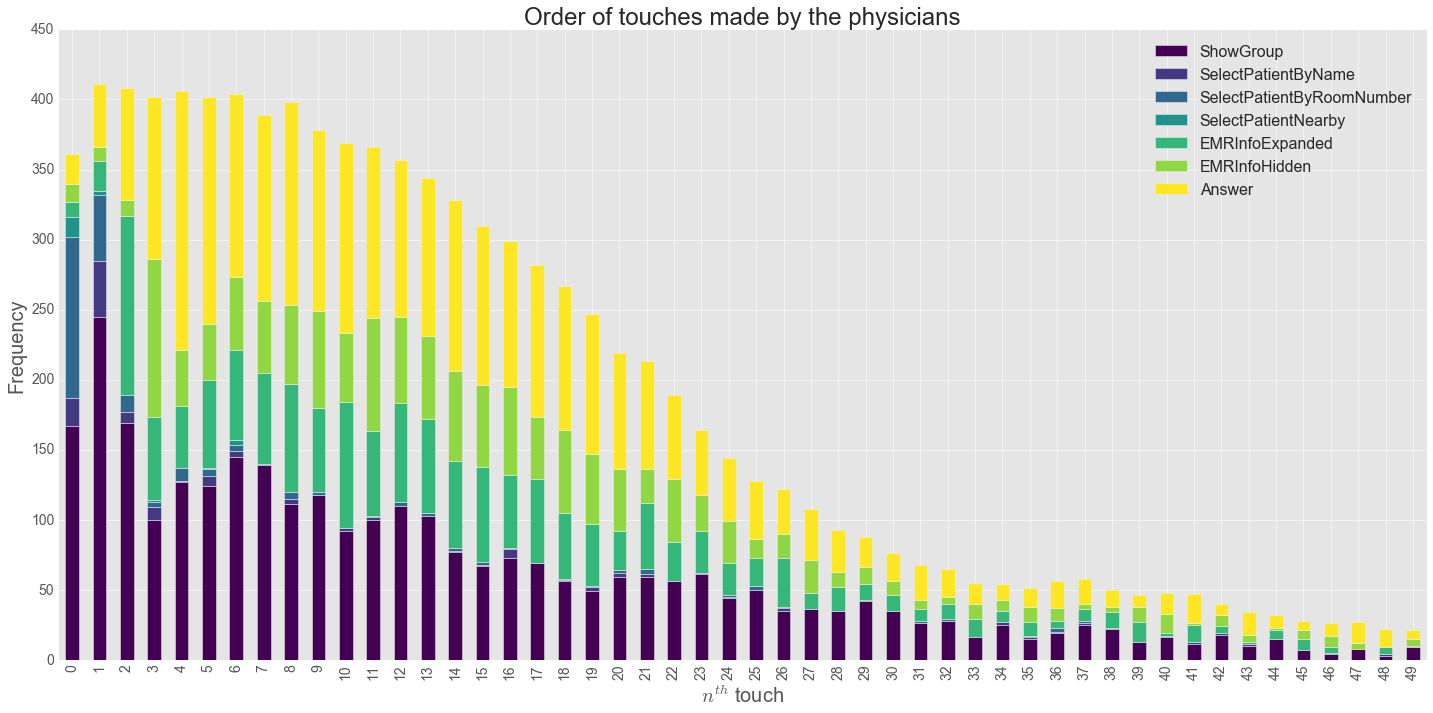

In [33]:
font_size=20
df_action_count.iloc[:50].plot(kind='bar',stacked=True,figsize=(20,10), colormap=cm.viridis, fontsize=0.7*font_size)
plt.legend(fontsize=0.8*font_size)
plt.title('Order of touches made by the physicians',fontsize=1.2*font_size)
plt.xlabel('$n^{th}$ touch',fontsize=font_size)
plt.ylabel('Frequency',fontsize=font_size)
plt.tight_layout()
plt.savefig('../../result/iphoneapp/touch_frequency_120516.png',transparent=True)

In [34]:
df_action_count

,ShowGroup,SelectPatientByName,SelectPatientByRoomNumber,SelectPatientNearby,EMRInfoExpanded,EMRInfoHidden,Answer
0,167.0,20.0,115.0,14.0,11.0,13.0,21.0
1,245.0,40.0,47.0,3.0,21.0,10.0,45.0
2,169.0,8.0,12.0,0.0,128.0,11.0,80.0
3,100.0,9.0,4.0,1.0,59.0,113.0,116.0
4,127.0,1.0,9.0,0.0,44.0,40.0,185.0
5,124.0,7.0,5.0,1.0,63.0,40.0,162.0
6,145.0,4.0,4.0,4.0,64.0,52.0,131.0
7,139.0,0.0,1.0,0.0,65.0,51.0,133.0
8,111.0,4.0,5.0,0.0,77.0,56.0,145.0
9,118.0,0.0,2.0,0.0,60.0,69.0,129.0


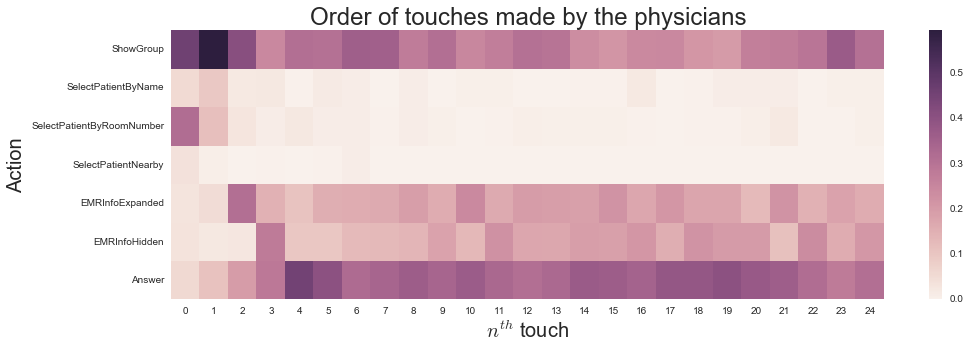

In [35]:
import seaborn as sns

plt.figure(figsize=(15,5))
df_action_count_normed = df_action_count.div(df_action_count.sum(axis=1), axis=0)
sns.heatmap(df_action_count_normed.iloc[:25].T)
plt.title('Order of touches made by the physicians',fontsize=1.2*font_size)
plt.xlabel('$n^{th}$ touch',fontsize=font_size)
plt.ylabel('Action',fontsize=font_size)
plt.tight_layout()
plt.savefig('../../result/iphoneapp/touch_frequency_heatmap_120516.png',transparent=True)

In [36]:
answer_list = ['Answer_0101','Answer_0102', 'Answer_0201','Answer_0202', 'Answer_0203', 'Answer_0204',
               'Answer_0301', 'Answer_0401', 'Answer_0501', 'Answer_0601', 'Answer_0701', 'Answer_0702',
                 'Answer_0801']

In [37]:
df_answer_count = df_touch_series.apply(pd.Series.value_counts, axis=1)[answer_list].fillna(0)

In [38]:
df_answer_count

,Answer_0101,Answer_0102,Answer_0201,Answer_0202,Answer_0203,Answer_0204,Answer_0301,Answer_0401,Answer_0501,Answer_0601,Answer_0701,Answer_0702,Answer_0801
0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,1.0,0.0,5.0,3.0,1.0
1,2.0,0.0,7.0,2.0,1.0,0.0,5.0,3.0,6.0,4.0,5.0,3.0,7.0
2,27.0,0.0,1.0,3.0,2.0,0.0,12.0,1.0,6.0,8.0,11.0,6.0,3.0
3,23.0,1.0,17.0,6.0,0.0,0.0,13.0,12.0,1.0,13.0,9.0,13.0,8.0
4,33.0,4.0,17.0,15.0,1.0,0.0,26.0,6.0,7.0,19.0,29.0,8.0,20.0
5,15.0,4.0,21.0,14.0,8.0,0.0,18.0,12.0,7.0,14.0,7.0,26.0,16.0
6,7.0,1.0,11.0,19.0,4.0,0.0,17.0,8.0,21.0,11.0,10.0,13.0,9.0
7,10.0,1.0,3.0,6.0,7.0,0.0,14.0,25.0,10.0,4.0,26.0,9.0,18.0
8,1.0,1.0,4.0,4.0,6.0,0.0,33.0,14.0,17.0,10.0,12.0,25.0,18.0
9,4.0,0.0,3.0,4.0,0.0,0.0,28.0,16.0,18.0,13.0,20.0,10.0,13.0


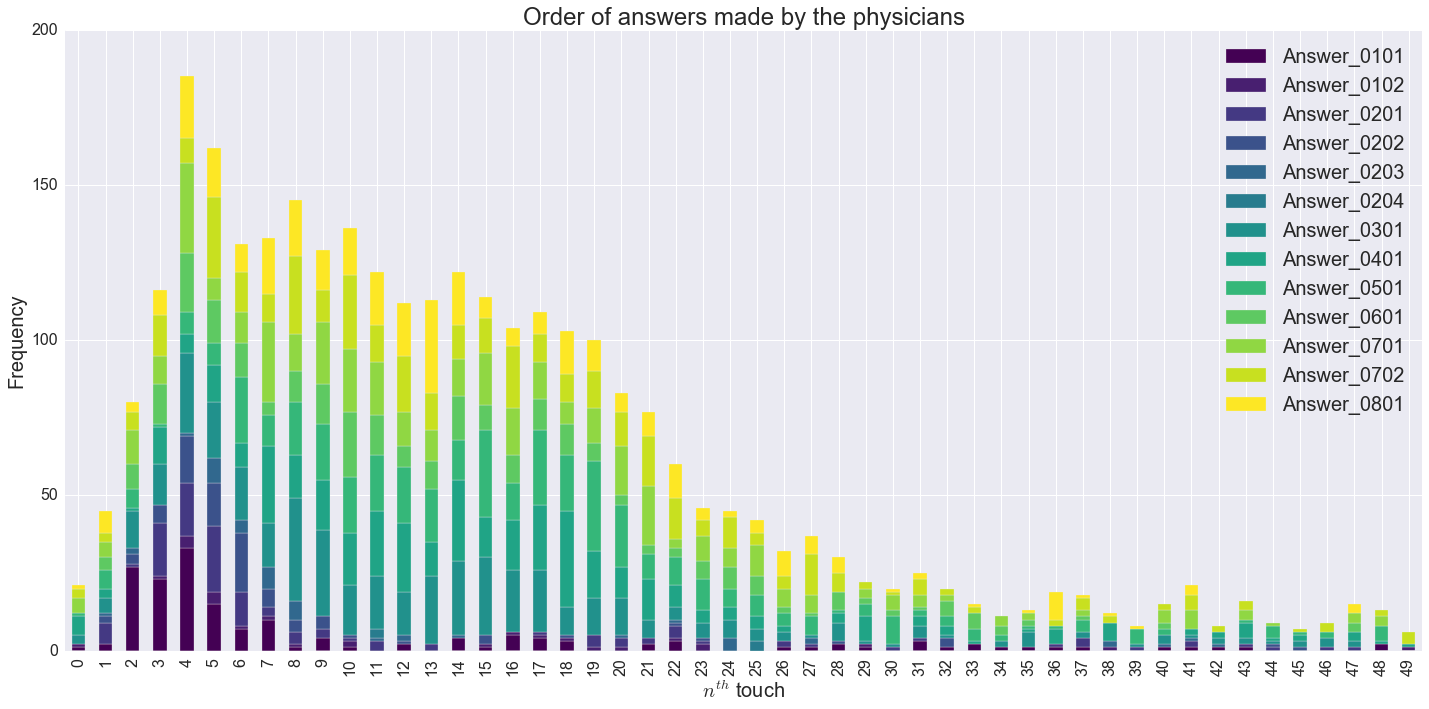

In [39]:
df_answer_count = df_answer_count.iloc[:50]
df_answer_count.plot(kind='bar',stacked=True,figsize=(20,10), colormap=cm.viridis, fontsize=0.8*font_size)
plt.legend(fontsize=font_size)
plt.title('Order of answers made by the physicians',fontsize=1.2*font_size)
plt.xlabel('$n^{th}$ touch',fontsize=font_size)
plt.ylabel('Frequency',fontsize=font_size)
plt.tight_layout()
plt.savefig('../../result/iphoneapp/answer_frequency_120516.png',transparent=True)

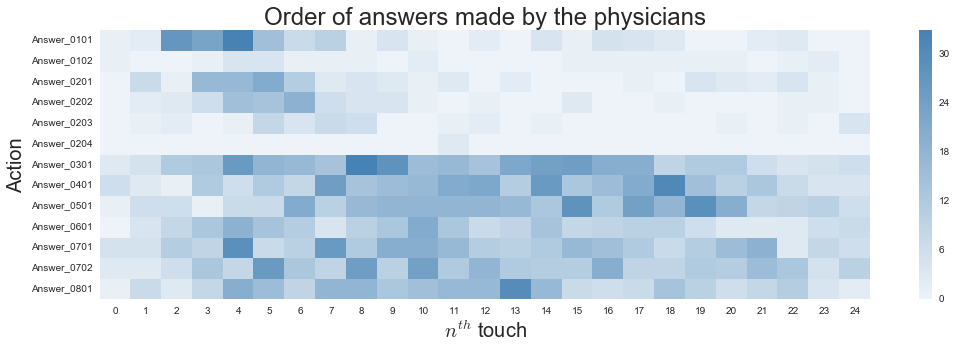

In [40]:
plt.figure(figsize=(15,5))
df_answer_count_normed = df_answer_count.div(df_answer_count.sum(axis=1), axis=0)

cmap = sns.light_palette('steelblue', as_cmap=True)
sns.heatmap(df_answer_count.iloc[:25].T, cmap=cmap)
plt.title('Order of answers made by the physicians',fontsize=1.2*font_size)
plt.xlabel('$n^{th}$ touch',fontsize=font_size)
plt.ylabel('Action',fontsize=font_size)
plt.tight_layout()
plt.savefig('../../result/iphoneapp/answer_frequency_heatmap_120516.png',transparent=True)

In [41]:
df_action_series

,57_0,57_1,57_2,57_3,57_4,57_5,57_6,57_7,57_8,57_9,...,21_40,21_41,21_42,21_43,21_44,21_45,21_46,21_47,21_48,21_49
0,ShowGroup,SelectPatientByName,Load,ShowGroup,Logout,Load,Logout,Connecting,Load,Load,...,ShowGroup,EMRInfoExpanded,"SelectPatientOptional(""Nearby"")","SelectPatientOptional(""ByName"")","SelectPatientOptional(""ByName"")","SelectPatientOptional(""ByName"")",Connecting,Logout,Challenge,Challenge
1,NaN,Answer,NaN,NaN,NaN,NaN,NaN,Error,NaN,Order,...,Answer,EMRInfoHidden,ShowGroup,ShowGroup,ShowGroup,ShowGroup,Authenticating,Challenge,Connecting,Connecting
2,NaN,Answer,NaN,NaN,NaN,NaN,NaN,Authenticating,NaN,Order,...,Answer,Answer,EMRInfoExpanded,ShowGroup,EMRInfoExpanded,Answer,Logged,Challenge Error,Logged,Error
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connecting,NaN,SelectPatientByRoomNumber,...,ShowGroup,Answer,EMRInfoHidden,Answer,EMRInfoHidden,Answer,Load,NaN,Load,Connecting
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Logged,NaN,ShowGroup,...,ShowGroup,EMRInfoExpanded,Answer,Load,Answer,ShowGroup,"SelectPatientOptional(""ByName"")",NaN,Order,Authenticating
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Load,NaN,ShowGroup,...,Answer,EMRInfoHidden,Answer,"SelectPatientOptional(""ByName"")",ShowGroup,Answer,Load,NaN,"SelectPatientOptional(""ByRoomNumber"")",Logged
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer,...,ShowGroup,Answer,ShowGroup,ShowGroup,EMRInfoExpanded,ShowGroup,Order,NaN,ShowGroup,Load
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer,...,ShowGroup,ShowGroup,EMRInfoExpanded,EMRInfoExpanded,EMRInfoHidden,Answer,"SelectPatientOptional(""ByRoomNumber"")",NaN,ShowGroup,"SelectPatientOptional(""ByName"")"
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer,...,ShowGroup,ShowGroup,EMRInfoExpanded,EMRInfoHidden,Answer,Answer,ShowGroup,NaN,ShowGroup,ShowGroup
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ShowGroup,...,Answer,ShowGroup,EMRInfoHidden,Answer,Answer,Answer,EMRInfoHidden,NaN,ShowGroup,Answer


### How many patients have been answered per 'touch_series'

In [42]:
#get list of tuples where (column, index) value is Answer in df_answers
answer_loc = []
df_action_series = df_action_series.fillna('0')
for col in df_action_series.columns:
    indexes = df_action_series[col][df_action_series[col]=='Answer'].dropna().index.tolist()
    answer_loc.extend([(col, i) for i in indexes])
    

In [43]:
# df_touch_series = pd.DataFrame(index=np.arange(0, max(touch_numbers[:-10]),1))
string = 'T:1 P:6b9d3f95c5723253c43ecf5356f19959bf4f47e9 Q:0702 A:N'
string.split()[1]

'P:6b9d3f95c5723253c43ecf5356f19959bf4f47e9'

In [44]:
df_touch_patient_series = pd.DataFrame(index=np.arange(0, max(touch_numbers[:-10]),1))
for user, touch_series in use_series_dict.items():
    print(user)
    series_i = 0
    for a_series in touch_series: #touch series is all of the series of touches made by the user
        touch_spec = []
        for a_touch in a_series: #a_series is a sequence of touches
            time = a_touch[0]
            action = a_touch[1]
            value = a_touch[2]
            
            if type(value) == float:
                if isnan(value):
                    value = ''
            else:
                if action=='Answer':
                    value= '{}_{}'.format(value.split()[2].split(':')[1], value.split()[1].split(':')[1])
                    if '$' in value:
                        value = value[1:] #get rid of the $ sign
            touch_spec.append('{}_{}'.format(action, value))

        df_new_touch_series = pd.DataFrame({'{}_{}'.format(user, series_i):touch_spec})
        print('\t', len(df_new_touch_series))
#         df_touch_series = df_touch_series.append(df_new_touch_series, axis=1) 
        df_touch_patient_series = pd.concat([df_touch_patient_series, df_new_touch_series], axis=1)
#         print(df_touch_series.columns)
        series_i += 1

57
	 1
	 3
	 1
	 1
	 1
	 1
	 1
	 6
	 1
	 16
	 13
	 17
	 5
	 5
	 78
	 1
	 13
	 14
	 24
	 39
56
	 7
	 2
	 6
	 11
	 3
	 10
	 27
	 1
	 1
	 1
	 1
	 1
	 3
	 2
	 2
	 2
	 1
	 1
	 2
	 7
	 19
	 19
	 24
	 20
	 5
	 4
	 17
	 17
	 16
	 12
	 16
	 21
	 1
	 43
	 16
	 27
20
	 5
	 25
	 19
	 7
	 9
	 9
	 14
	 19
	 22
	 3
	 22
	 3
	 15
	 3
	 20
	 10
	 3
	 20
	 13
	 1
	 5
	 10
	 7
	 16
	 2
	 47
	 4
	 25
	 7
	 23
	 17
	 8
	 30
	 18
	 19
	 3
	 16
	 33
	 17
	 23
	 28
	 16
	 32
	 45
	 1
	 23
	 5
	 26
	 7
	 27
	 20
	 41
	 1
	 54
	 22
	 20
	 4
	 3
	 17
	 3
	 9
	 3
	 1
	 20
	 5
	 23
	 9
	 3
	 12
	 1
	 15
	 1
	 2
	 2
	 1
	 112
	 50
	 7
	 4
	 3
	 18
	 1
	 1
	 1
	 1
	 5
	 39
	 1
	 74
	 2
	 7
	 49
	 34
	 1
	 5
	 2
18
	 8
	 1
	 29
	 10
	 15
	 13
	 2
	 13
	 23
	 19
	 1
	 11
	 9
	 19
	 27
	 2
	 21
	 49
	 34
	 49
	 17
	 26
	 58
	 30
	 28
	 21
	 25
	 29
	 21
	 30
	 22
	 24
	 24
	 5
	 1
	 23
	 25
	 2
	 25
	 12
	 10
	 23
	 24
	 1
	 39
	 24
	 12
	 33
	 23
	 22
	 5
	 7
	 44
	 27
	 6
	 1
	 14
	 51
	 36
	 30
	 14
	 14
	 38
	 3
	 

In [45]:
df_touch_patient_series

,57_0,57_1,57_2,57_3,57_4,57_5,57_6,57_7,57_8,57_9,...,21_40,21_41,21_42,21_43,21_44,21_45,21_46,21_47,21_48,21_49
0,ShowGroup_08,SelectPatientByName_6b9d3f95c5723253c43ecf5356...,Load_loaded,ShowGroup_06,Logout_nm177881,Load_loaded,Logout_mbechel1,Connecting_nm177881,Load_loaded,Load_loaded,...,ShowGroup_01,EMRInfoExpanded_LINES_FOOD,"SelectPatientOptional(""Nearby"")_9d2ac598ddf2c9...","SelectPatientOptional(""ByName"")_9d2ac598ddf2c9...","SelectPatientOptional(""ByName"")_b40446e9f44e68...","SelectPatientOptional(""ByName"")_eccd8e01167317...",Connecting_nm177671,Logout_,Challenge_nm177671,Challenge_jpaoness
1,NaN,Answer_0701_6b9d3f95c5723253c43ecf5356f19959bf...,NaN,NaN,NaN,NaN,NaN,Error_nm177881,NaN,Order_nearby,...,Answer_0201_fa4c24ee999d3cae5074d01de8c0125652...,EMRInfoHidden_LINES_FOOD,ShowGroup_07,ShowGroup_07,ShowGroup_07,ShowGroup_01,Authenticating_nm177671,Challenge_nm177671,Connecting_nm177671,Connecting_jpaoness
2,NaN,Answer_0702_6b9d3f95c5723253c43ecf5356f19959bf...,NaN,NaN,NaN,NaN,NaN,Authenticating_nm177881,NaN,Order_roomnumber,...,Answer_0202_fa4c24ee999d3cae5074d01de8c0125652...,Answer_0301_fa4c24ee999d3cae5074d01de8c0125652...,EMRInfoExpanded_DVT,ShowGroup_03,EMRInfoExpanded_DVT,Answer_0101_eccd8e0116731739b18f553725bff8fcbd...,Logged_nm177671,Challenge Error_nm177671,Logged_nm177671,Error_jpaoness
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connecting_nm177881,NaN,SelectPatientByRoomNumber_df854aeecc3d24dad46c...,...,ShowGroup_06,Answer_0401_fa4c24ee999d3cae5074d01de8c0125652...,EMRInfoHidden_DVT,Answer_0301_9d2ac598ddf2c9e1678862297e2c0dc9e7...,EMRInfoHidden_DVT,Answer_0202_eccd8e0116731739b18f553725bff8fcbd...,Load_loaded,NaN,Load_loaded,Connecting_jpaoness
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Logged_nm177881,NaN,ShowGroup_01,...,ShowGroup_01,EMRInfoExpanded_LINES_FOOD,Answer_0701_9d2ac598ddf2c9e1678862297e2c0dc9e7...,Load_loaded,Answer_0701_b40446e9f44e6868050d801faaded3c016...,ShowGroup_08,"SelectPatientOptional(""ByName"")_27178165f86bd3...",NaN,Order_roomnumber,Authenticating_jpaoness
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Load_loaded,NaN,ShowGroup_03,...,Answer_0203_fa4c24ee999d3cae5074d01de8c0125652...,EMRInfoHidden_LINES_FOOD,Answer_0702_9d2ac598ddf2c9e1678862297e2c0dc9e7...,"SelectPatientOptional(""ByName"")_da3e58d5fc35fa...",ShowGroup_03,Answer_0801_eccd8e0116731739b18f553725bff8fcbd...,Load_loaded,NaN,"SelectPatientOptional(""ByRoomNumber"")_34ff225a...",Logged_jpaoness
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer_0301_df854aeecc3d24dad46cc4bdfe28c3d319...,...,ShowGroup_06,Answer_0501_fa4c24ee999d3cae5074d01de8c0125652...,ShowGroup_08,ShowGroup_01,EMRInfoExpanded_LINES_FOOD,ShowGroup_03,Order_roomnumber,NaN,ShowGroup_03,Load_loaded
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer_0401_df854aeecc3d24dad46cc4bdfe28c3d319...,...,ShowGroup_01,ShowGroup_06,EMRInfoExpanded_PRESSURE_ULCERS,EMRInfoExpanded_VENTILATOR_WEANING,EMRInfoHidden_LINES_FOOD,Answer_0301_eccd8e0116731739b18f553725bff8fcbd...,"SelectPatientOptional(""ByRoomNumber"")_34ff225a...",NaN,ShowGroup_08,"SelectPatientOptional(""ByName"")_bca7ef86f94cb8..."
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Answer_0501_df854aeecc3d24dad46cc4bdfe28c3d319...,...,ShowGroup_06,ShowGroup_01,EMRInfoExpanded_PRESSURE_ULCERS,EMRInfoHidden_VENTILATOR_WEANING,Answer_0301_b40446e9f44e6868050d801faaded3c016...,Answer_0401_eccd8e0116731739b18f553725bff8fcbd...,ShowGroup_08,NaN,ShowGroup_07,ShowGroup_01
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ShowGroup_06,...,Answer_0601_fa4c24ee999d3cae5074d01de8c0125652...,ShowGroup_06,EMRInfoHidden_PRESSURE_ULCERS,Answer_0201_da3e58d5fc35fa461c42c1f17b2a14349f...,Answer_0501_b40446e9f44e6868050d801faaded3c016...,Answer_0501_eccd8e0116731739b18f553725bff8fcbd...,EMRInfoHidden_PRESSURE_ULCERS,NaN,ShowGroup_10,Answer_0101_bca7ef86f94cb8a28286a3ed932d465927...


In [46]:
#of patient
patient_per_session = {}
for col, idx in answer_loc:
    print(col, idx)
    if col not in patient_per_session.keys():
        patient_per_session[col] = []
    patient = df_touch_patient_series[col].iloc[idx].split('_')[-1]
#     print(df_touch_patient_series[col].iloc[idx])
    if patient not in patient_per_session[col]:
        patient_per_session[col].append(patient)

57_1 1
57_1 2
57_9 6
57_9 7
57_9 8
57_9 10
57_9 12
57_9 14
57_9 15
57_10 3
57_10 4
57_10 5
57_10 7
57_10 9
57_10 11
57_10 12
57_11 3
57_11 5
57_11 7
57_11 8
57_11 9
57_11 11
57_11 16
57_12 3
57_12 4
57_14 3
57_14 4
57_14 5
57_14 7
57_14 9
57_14 10
57_14 13
57_14 17
57_14 18
57_14 19
57_14 22
57_14 23
57_14 25
57_14 26
57_14 27
57_14 29
57_14 31
57_14 32
57_14 33
57_14 35
57_14 36
57_14 40
57_14 41
57_14 43
57_14 44
57_14 45
57_14 47
57_14 48
57_14 49
57_14 52
57_14 54
57_14 56
57_14 62
57_14 63
57_14 64
57_14 66
57_14 67
57_14 68
57_14 70
57_14 72
57_14 73
57_14 75
57_16 4
57_16 5
57_16 7
57_16 8
57_16 10
57_17 5
57_17 6
57_17 8
57_17 9
57_17 11
57_17 13
57_18 4
57_18 5
57_18 7
57_18 9
57_18 10
57_18 16
57_18 18
57_18 20
57_18 22
57_18 23
57_19 3
57_19 5
57_19 9
57_19 11
57_19 12
57_19 13
57_19 18
57_19 20
57_19 22
57_19 29
57_19 31
57_19 32
56_0 0
56_0 2
56_2 5
56_3 1
56_3 2
56_3 5
56_6 8
56_6 12
56_6 16
56_6 17
56_6 21
56_6 24
56_6 25
56_8 0
56_9 0
56_10 0
56_15 1
56_18 1
56_20 3
56_

In [47]:
patient_per_session

{'16_17': ['99e907c21750168e3ceb89ab22f756d5d511379c'],
 '16_24': ['bdf0eb53d7d948fac2ddcd27769609a828555d4c'],
 '16_27': ['ae2c7f038c096195b7d59b64370a082fe1a2d13c'],
 '16_31': ['157d3ef5f5a2e1f00e4ce90f4604985c43a104f2'],
 '16_5': ['004717b055f69577e3abcaf349d920df68c4aebb'],
 '18_11': ['e361db4046bfc57e7e45c693c992d950686ef24c'],
 '18_12': ['f1fd08148dfd74b36f8af5d83e54deee58af4fb9'],
 '18_13': ['f1fd08148dfd74b36f8af5d83e54deee58af4fb9',
  '304f637c9e34809143c9c6f26626ba1bca0dbad1'],
 '18_14': ['304f637c9e34809143c9c6f26626ba1bca0dbad1',
  'cba75237237c1b01190f3d2dd7e033d4c1ecacbf'],
 '18_15': ['cba75237237c1b01190f3d2dd7e033d4c1ecacbf'],
 '18_16': ['28d3fdf3f9eb0beab726c000e5a6e5ebb5c298e9'],
 '18_17': ['39e994b94d45f93f494b6fca2c4265071051d026',
  'b712e9b65a06b626b8a61517a2431f08c94e812e'],
 '18_18': ['e3f2249fbe2a462fde703c9108f223d95231fd1c'],
 '18_19': ['2b43652946310807e7878ba3df179661f04dfed0',
  'eccd8e0116731739b18f553725bff8fcbde53ff9'],
 '18_2': ['5ae85fe6eb6a88ad0fe377

In [48]:
patient_num_per_session = []
for key, val in patient_per_session.items():
    patient_num_per_session.append(len(val))

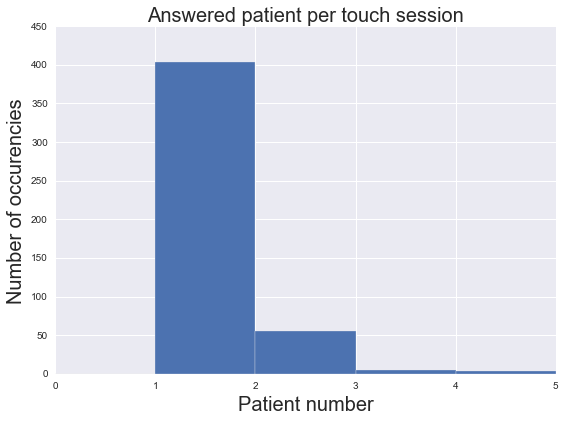

In [49]:
plt.figure(figsize=(8,6))
plt.hist(patient_num_per_session, bins=np.arange(0, max(patient_num_per_session),1))
plt.title('Answered patient per touch session', fontsize=font_size)
plt.xlabel('Patient number', fontsize=font_size)
plt.ylabel('Number of occurencies',fontsize=font_size)
plt.tight_layout()
plt.savefig('../../result/iphoneapp/answered_patients_per_session_120516.png',transparent=True)

### Relation between first-second touch
Heatmap of correlation coefficient. 
(given the first touch is answer, what is the second touch)

In [50]:
action_values = np.unique(df_action_series.values).tolist()
action_values.remove('0')
action_values

['Answer',
 'Authenticating',
 'Challenge',
 'Challenge Error',
 'Connecting',
 'EMRInfoExpanded',
 'EMRInfoHidden',
 'Error',
 'Help',
 'HideCompletedPatients',
 'Load',
 'Logged',
 'Logout',
 'Order',
 'RefreshControl',
 'SelectPatientByName',
 'SelectPatientByRoomNumber',
 'SelectPatientNearby',
 'SelectPatientOptional("ByName")',
 'SelectPatientOptional("ByRoomNumber")',
 'SelectPatientOptional("Nearby")',
 'ShowGroup']

In [51]:
action_values= ['Answer',
 'EMRInfoExpanded',
 'EMRInfoHidden',
 'HideCompletedPatients',
 'SelectPatientByName',
 'SelectPatientByRoomNumber',
 'SelectPatientNearby',
 'SelectPatientOptional("ByName")',
 'SelectPatientOptional("ByRoomNumber")',
 'SelectPatientOptional("Nearby")',
 'ShowGroup']

In [52]:
df_touch_correlation = pd.DataFrame(0, index =action_values, columns=action_values)
for col in df_action_series.columns:
    touch_series = df_action_series[col].drop(df_action_series[df_action_series[col] == '0'].index).values.tolist()
    print(touch_series)
    for i in range(len(touch_series)-1):
        action_from = touch_series[i]
        action_to = touch_series[i+1]
        if action_from in action_values and action_to in action_values:
            print('\t', action_from, action_to)
            df_touch_correlation[action_to][action_from] += 1


['ShowGroup']
['SelectPatientByName', 'Answer', 'Answer']
	 SelectPatientByName Answer
	 Answer Answer
['Load']
['ShowGroup']
['Logout']
['Load']
['Logout']
['Connecting', 'Error', 'Authenticating', 'Connecting', 'Logged', 'Load']
['Load']
['Load', 'Order', 'Order', 'SelectPatientByRoomNumber', 'ShowGroup', 'ShowGroup', 'Answer', 'Answer', 'Answer', 'ShowGroup', 'Answer', 'ShowGroup', 'Answer', 'ShowGroup', 'Answer', 'Answer']
	 SelectPatientByRoomNumber ShowGroup
	 ShowGroup ShowGroup
	 ShowGroup Answer
	 Answer Answer
	 Answer Answer
	 Answer ShowGroup
	 ShowGroup Answer
	 Answer ShowGroup
	 ShowGroup Answer
	 Answer ShowGroup
	 ShowGroup Answer
	 Answer Answer
['Load', 'SelectPatientByRoomNumber', 'ShowGroup', 'Answer', 'Answer', 'Answer', 'ShowGroup', 'Answer', 'ShowGroup', 'Answer', 'ShowGroup', 'Answer', 'Answer']
	 SelectPatientByRoomNumber ShowGroup
	 ShowGroup Answer
	 Answer Answer
	 Answer Answer
	 Answer ShowGroup
	 ShowGroup Answer
	 Answer ShowGroup
	 ShowGroup Answer
	 A

In [53]:
df_touch_correlation['Answer']['EMRInfoExpanded']

142

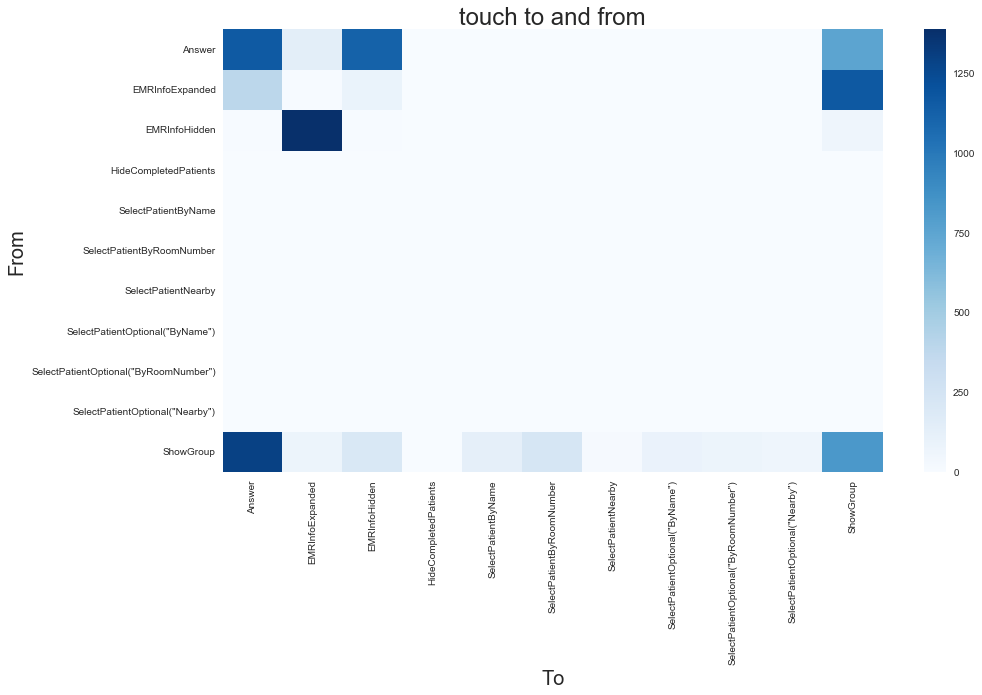

In [54]:
plt.figure(figsize=(15,10))
# df_answer_count_normed = df_answer_count.div(df_answer_count.sum(axis=1), axis=0)

cmap = sns.light_palette('steelblue', as_cmap=True)
sns.heatmap(df_touch_correlation.iloc[:25].T, cmap='Blues')
sns.set(font_scale=1.6)
plt.title('touch to and from',fontsize=1.2*font_size)
plt.xlabel('To',fontsize=font_size)
plt.ylabel('From',fontsize=font_size)
plt.tight_layout()
plt.savefig('../../result/iphoneapp/action_from_to_120516.png',transparent=True)